In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import warnings
from sklearn.metrics import classification_report

In [68]:
warnings.filterwarnings("ignore")

In [69]:
# Import data
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Description

Attribute Information: (classes: edible=e, poisonous=p)

• cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

• cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

• cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

• bruises: bruises=t,no=f

• odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

• gill-attachment: attached=a,descending=d,free=f,notched=n

• gill-spacing: close=c,crowded=w,distant=d

• gill-size: broad=b,narrow=n

• gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

• stalk-shape: enlarging=e,tapering=t

• stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

• stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• veil-type: partial=p,universal=u

• veil-color: brown=n,orange=o,white=w,yellow=y

• ring-number: none=n,one=o,two=t

• ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

• spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

• population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

• habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [70]:
# Converting the meaningless represenation of observation into meaningful
stalk_root = {"stalk_root":{"?":"m"}}
df= df.replace(stalk_root)

## EDA

In [71]:
# Renaming cloumn names
df = df.rename(columns = {"cap-shape":"cap_shape","cap-surface":"cap_surface","cap-color":"cap_color",
                          "gill-attachment":"gill_attachment","gill-spacing":"gill_spacing","gill-size":"gill_size",
                         "gill-color":"gill_color","stalk-shape":"stalk_shape","stalk-root":"stalk_root",
                          "stalk-surface-above-ring":"stalk_surface_above_ring","stalk-surface-below-ring":"stalk_surface_below_ring",
                         "stalk-color-above-ring":"stalk_color_above_ring","stalk-color-below-ring":"stalk_color_below_ring",
                         "veil-type":"veil_type","veil-color":"veil_color","ring-number":"ring_number","ring-type":"ring_type",
                         "spore-print-color":"spore_print_color"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [72]:
# Number of rows and columns in dataset
df.shape

(8124, 23)

In [73]:
#Value counts in output variable
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [74]:
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


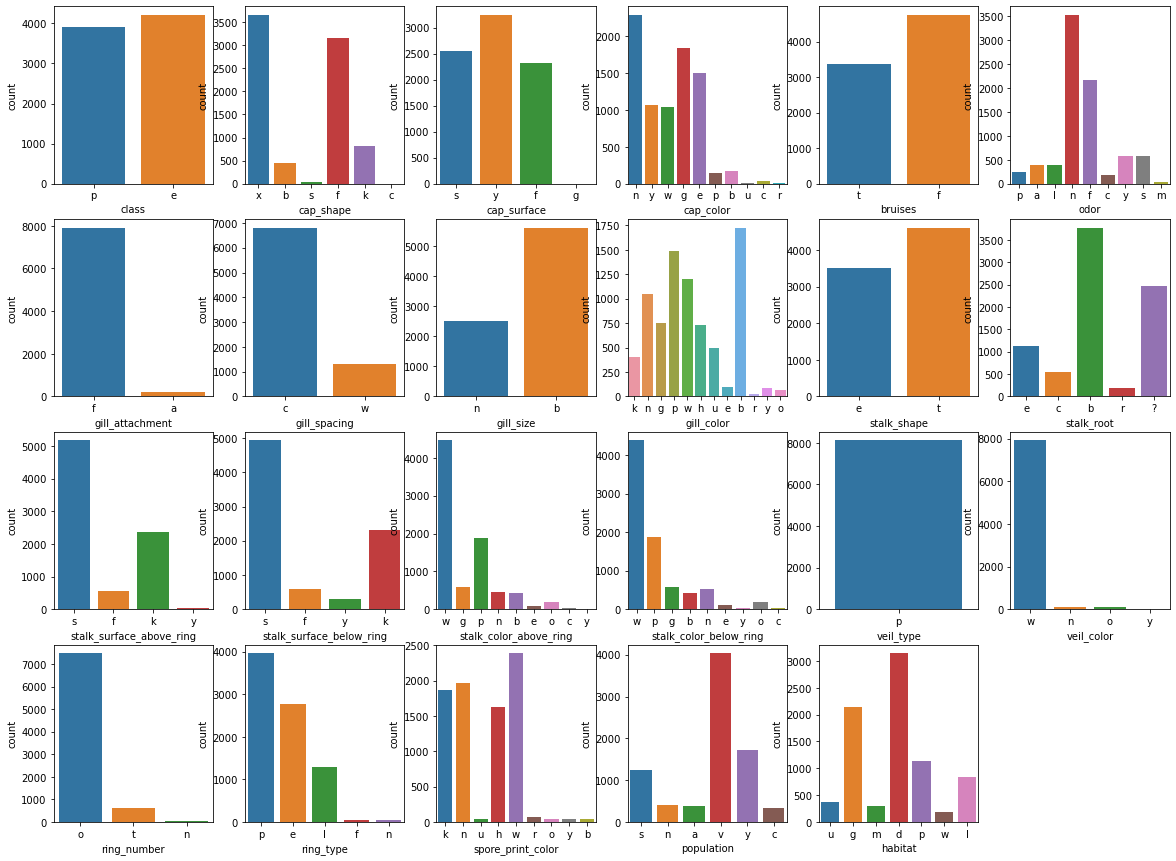

In [75]:
# Visualisation of features in the data
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df:
    # as there are 23 features in the data
    if plotnumber<=23 :     
        ax = plt.subplot(4,6,plotnumber)
        sb.countplot(df[column])
        plt.xlabel(column,fontsize= 10)
        
    plotnumber+=1
plt.show()

In [76]:
# Deleting unnecessay feature
del df['veil_type']

## Visualisation of features in the data with respect to class variable

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Size')

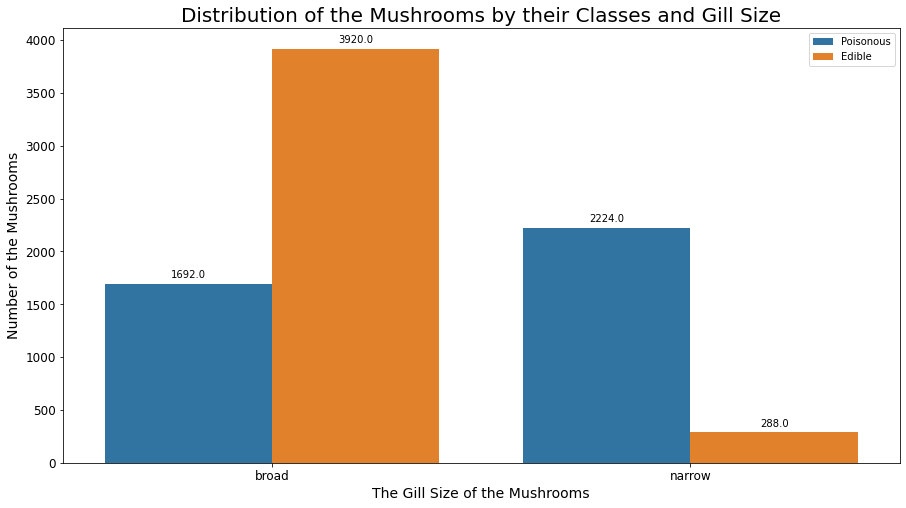

In [77]:
#Distribution of the Mushrooms by their Classes and Gill Size
plt.figure(figsize=(15, 8))
multi_plot = sb.countplot(data=df, x='gill_size',
                      hue='class',
                      order=df['gill_size'].value_counts().index)
                      
multi_plot.set_xticklabels(['broad', 'narrow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Size of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Size', fontsize=20)

## Data Preprocessing 

In [78]:
#Label encoding
le = LabelEncoder()
df1 = df.apply(le.fit_transform)
df1

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [79]:
#Independent and dependent variables
X = df1.drop("class", axis = 1)
y = df1['class']

In [80]:
#splitting data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 101)

In [81]:
# Depenent variable observation names
target_names = ['Edible','Poisson']

## Model Building

## Decision Tree

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


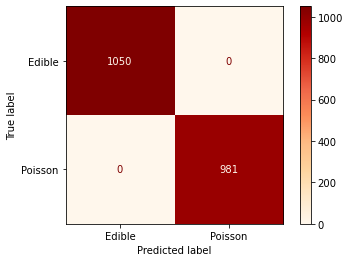

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 265)
dt = dt.fit(X_train,Y_train)

# Predictions:
y_pred_dt = dt.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_dt))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(dt, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_dt))
print("---------------------------------------------------------")
#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_dt))

## Decision Tree Parameter Tuning

In [83]:
leaves = [1,2,4,5,10,20,30,40,80,100]
grid_param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

grid_search = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=6,n_jobs =-1,verbose = 3)

grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 6 folds for each of 40 candidates, totalling 240 fits


{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


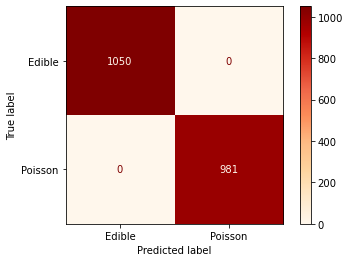

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [84]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_features = 'auto', min_samples_leaf = 1)
dt1 = dt1.fit(X_train,Y_train)

# Predictions:
y_pred_dt1 = dt1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_dt1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(dt1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_dt1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_dt1))

## Random Forest

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


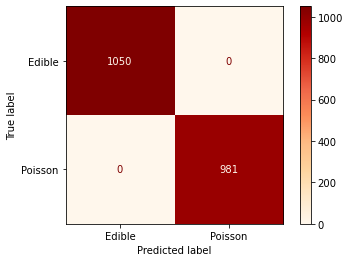

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=265)
rf = rf.fit(X_train,Y_train)

# Predictions:
y_pred_rf = rf.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_rf))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(rf, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_rf))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_rf))

## Random Forest Parameter Tuning 

In [86]:
grid_param_rand = {
    "n_estimators" : [10,20,30,40,50,100,150],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rf,param_grid=grid_param_rand,cv=6,n_jobs =-1,verbose = 3)

grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 6 folds for each of 28 candidates, totalling 168 fits


{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


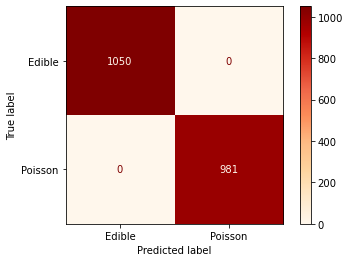

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [87]:
rf1 = RandomForestClassifier(criterion = "gini",
                             max_features = "auto",
                             n_estimators = 10)
rf1 = rf1.fit(X_train,Y_train)

# Predictions:
y_pred_rf1 = rf1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_rf1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(rf1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_rf1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_rf1))

In [88]:
#Creating Pickle file
filename = 'mushrooms.pkl'
pickle.dump(rf1, open(filename, 'wb'))

## Ada Boost

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


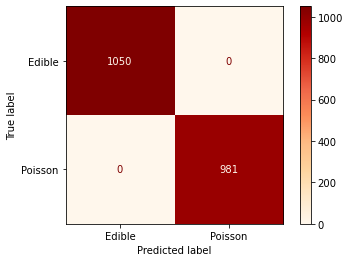

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [89]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=265)
ada = ada.fit(X_train,Y_train)

# Predictions:
y_pred_ada = ada.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_ada))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(ada, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_ada))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_ada))

## Ada Boost Parameter Tuning

In [90]:
grid_param_ada={
    'n_estimators':[500,1000,1500,2000],
    'learning_rate':[0.001,0.01,0.1]
}

grid_search_ada = GridSearchCV(estimator=ada,
                               param_grid=grid_param_ada,
                               cv=5,n_jobs =-1,
                               verbose = 3)

grid_search_ada.fit(X_train,Y_train)
grid_search_ada.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 0.1, 'n_estimators': 1000}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


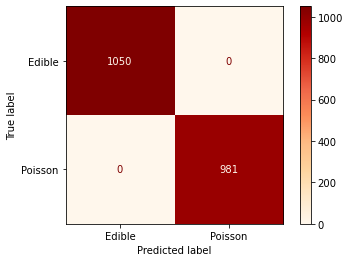

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [91]:
ada1 = AdaBoostClassifier(n_estimators = 1000,learning_rate = 0.1,random_state=265)
ada1 = ada1.fit(X_train,Y_train)

# Predictions:
y_pred_ada1 = ada1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_ada1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(ada1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_ada1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_ada1))

## Gradient Boosting 

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


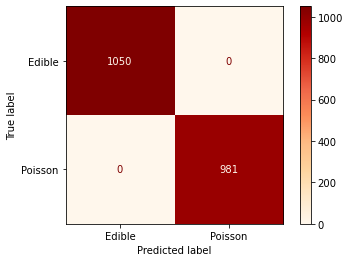

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=265)
grad = grad.fit(X_train,Y_train)

# Predictions:
y_pred_grad = grad.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_grad))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(grad, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_grad))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_grad))

## Gradient Boosting Parameter Tuning

In [93]:
grid_param_grad = {
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1]
}

grid_search_grad = GridSearchCV(estimator=grad,
                              param_grid=grid_param_grad,
                              cv=5,n_jobs =-1,
                              verbose = 3)

grid_search_grad.fit(X_train,Y_train)
grid_search_grad.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'learning_rate': 0.01, 'n_estimators': 2000}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


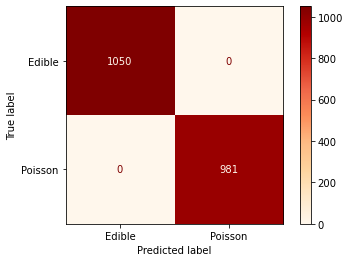

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [94]:
grad1 = GradientBoostingClassifier(n_estimators = 2000,learning_rate = 0.01,random_state=265)
grad1 = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_grad1 = grad1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_grad1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(grad1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_grad1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_grad1))

## XG Boosting

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


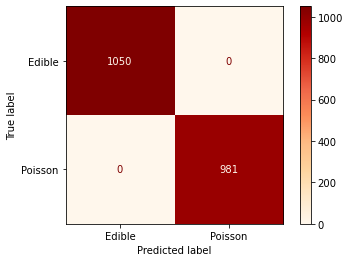

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [95]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=265)
xgb = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_xgb = xgb.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_xgb))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(xgb, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_xgb))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_xgb))

## XG Boost Parameter Tuning

In [96]:
grid_param_xgb = {
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1]
}

grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=grid_param_xgb,
                               cv=5,n_jobs =-1,
                               verbose = 3)

grid_search_xgb.fit(X_train,Y_train)
grid_search_xgb.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'learning_rate': 0.01, 'n_estimators': 2000}

Accuracy: 1.0
--------------------------------------------------------
Confusion Matrix


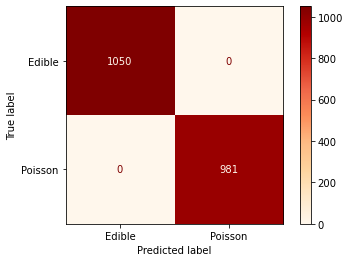

---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

---------------------------------------------------------
AUC Score: 1.0


In [97]:
xgb1 = XGBClassifier(learning_rate = 0.01, n_estimators = 2000,random_state=265)
xgb1 = grad1.fit(X_train,Y_train)

# Predictions:
y_pred_xgb1 = xgb1.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(Y_test,y_pred_xgb1))
print("--------------------------------------------------------")

#Confusion matrix and its visualisation
print("Confusion Matrix")
plot_confusion_matrix(xgb1, X_test, Y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.OrRd)
plt.show()
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(Y_test,y_pred_xgb1))
print("---------------------------------------------------------")

#AUC Score
print("AUC Score:",roc_auc_score(Y_test, y_pred_xgb1))